### Unsupervised Learning
#### Project: Creating Customer Segments
#### Getting Started
In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the UCI Machine Learning Repository. For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [30]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn import model_selection, tree

%matplotlib inline

In [18]:
# Importing the Dataset
try:
    data = pd.read_csv("Wholesale customers data.csv")
    data.drop(labels=(['Channel','Region']),axis=1,inplace=True)
    print('Wholesale customers has {} samples with {} features each'.format(*data.shape))
except:
    print('Sorry! Dataset could not be loaded.')

Wholesale customers has 440 samples with 6 features each


In [19]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
# Display a brief description of the overall dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# Display complete information of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [21]:
# Select three indices of your choice you wish to sample from the dataset
indices = [22,154,398]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,31276,1917,4469,9408,2381,4334
1,622,55,137,75,7,8
2,11442,1032,582,5390,74,247


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.
What kind of establishment (customer) could each of the three samples you've chosen represent?
Hint: Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying "McDonalds" when describing a sample customer as a restaurant.

### Answer:

Index 0: This establishment has the highest value of Milk and the second highest value of Detergents_Paoer among the three sets considered. When compared to the mean value of the Milk feature, this data point has the only positive value which leads to the conclusion that they spend more than average on milk. This can indicate that the customer is a convinience store aimed at providing quick necessities like detergents, napkins, milk, and toilet paper. The business spends on other products but convenience stores may spend more to aquire those basics.

Index 1: This establishment has the highest value of Fresh among the three sets considered. When compared to the mean value of the Fresh feature, this data point has the only positive value which leads to the conclusion that they spend more than average on fresh foods. This establishment can be a fresh produce market because of the high volume of fresh products. This customer can be a produce market because they have spending on other fields which matches the description of a produce market.

Index 2: This establishment has the highest value of Grocery among the three sets considered. The data point also spends $14,416 more than the median on groceries. The customer is likey a supermarket or a grocery store because it also has the highest value of Detergents_Paper and Frozen. The spending required to match these values requires a large inventory and supermarkets or grocery stores are a likely candidate.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:

1. Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.
2. Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets.
3. Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.
4. Import a decision tree regressor, set a random_state, and fit the learner to the training data.
5. Report the prediction score of the testing set using the regressor's score function.

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

In [31]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    new_data, data['Grocery'], test_size = 0.25, random_state = 13)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state = 13)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print('DT R^2 Score: {:.4f}'.format(score))

DT R^2 Score: 0.7539


### Question 2
Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?
Hint: The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.

### Answer:

The Grocery field was chosen to be the predictor among the others because it was common for customers to spend. The coefficient of determination was 0.7539 which can mean that 75.39% of the variation in the model can be explained by the decision tree regressor. This feature is necessary for identifying customer's spending habits because it's a common spending field within our data. After analyzing the sample sets, the Grocery field consistenty ranked among the top values in spending. The establishments will benefit from a model that predicts a field with high amount of spending.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

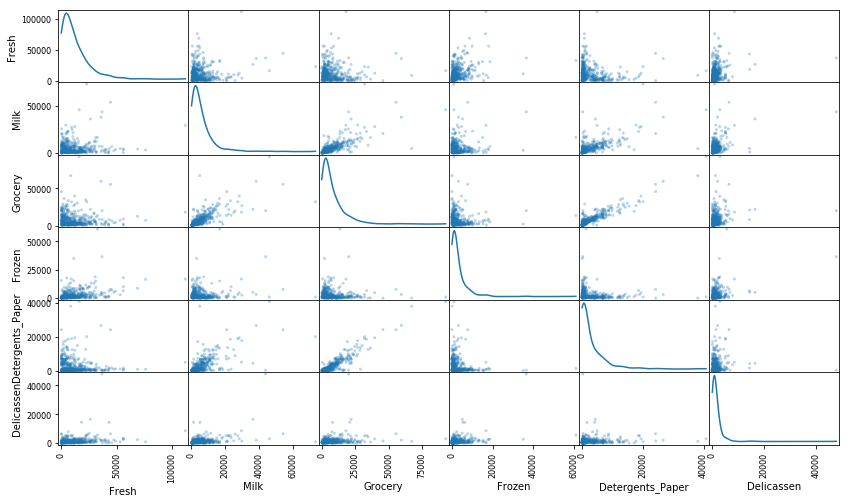

In [32]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?
Hint: Is the data normally distributed? Where do most of the data points lie?

### Answer:

The scatter matrix produces a grid of scatter plots and a diagonal depicting a frequency distribution when both axis are the same. The Grocery & Detergents_Paper pair show a positive linear correlation and the Grocery & Milk is another pair with more variance for the same type of correlation. This confirms a hypothesis that suspects the spending on Grocery is related to other spending on different categories. The frequency diagram depicts the spending as skewed to the right with no indication of normal distribution. This could be because the majority of the spending values are concentrated near zero and the lower bounds.

### Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

1. Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.
2. Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.

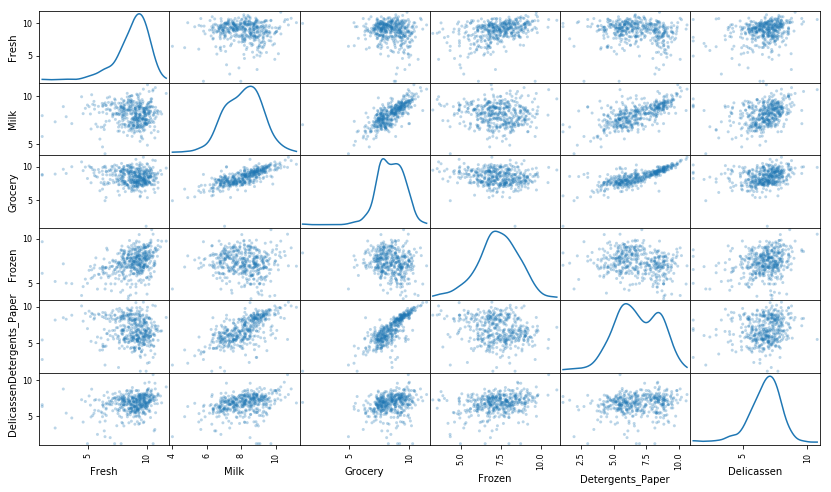

In [33]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [34]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,9.345046,6.939254,6.366470,8.592301,4.304065,5.509388


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:

Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
Assign the calculation of an outlier step for the given feature to step.
Optionally remove data points from the dataset by adding indices to the outliers list.

#### NOTE: If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [45]:
# Create list of outlier indeces as tuples
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = IQR * 1.5
    
    # Display the outliers
    print('Data points considered outliers for the feature {}:'.format(feature))
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers.extend([(feature, x) for x in feature_outliers.index])
    display(feature_outliers)
    
# OPTIONAL: Select the indices for data points you wish to remove
# Records with multiple features as an outlier are considered significant
outliers_significant = []

# List indeces with multiple features as outliers
for feature, index in outliers :
    # Skip if we have already recorded it as a significant outlier
    if index in outliers_significant :
        continue
        
    # Find all features this index is in as an outlier
    fields = [outlier[0] for outlier in outliers if outlier[1] == index]
    if len(fields) > 1 :
        outliers_significant.append(index)
        print('Index {} is an outlier for more than one feature including {}'.format(index, fields))
        

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers_significant]).reset_index(drop = True)

Data points considered outliers for the feature Fresh:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature Milk:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature Grocery:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature Frozen:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature Detergents_Paper:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature Delicassen:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Index 65 is an outlier for more than one feature including ['Fresh', 'Frozen']
Index 66 is an outlier for more than one feature including ['Fresh', 'Delicassen']
Index 128 is an outlier for more than one feature including ['Fresh', 'Delicassen']
Index 154 is an outlier for more than one feature including ['Milk', 'Grocery', 'Delicassen']
Index 75 is an outlier for more than one feature including ['Grocery', 'Detergents_Paper']


### Question 4
Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the outliers list to be removed, explain why.

### Answer:

Outliers were removed from the dataset if the data point had more than one feature marked as an outlier. There were five indeces that had more than one feature with an outlier based on Tukey's method for identifying outliers. Of the data points removed from the dataset, only one had 3 features marked as an outlier.

### Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:

1. Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
2. Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

In [51]:
# Import libraries necessary for PCA
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = good_data.shape[1])
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [55]:
print(pca.explained_variance_)

[4.54884001 2.70853407 1.26357989 1.03918256 0.49800271 0.20954208]


In [70]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [71]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.1419,-2.7722
1,6.6170,6.5320
2,3.7698,0.0071


### Observation
Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Clustering
In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

### Question 6
What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

### Answer:

The advantages of a K-Means clustering algorithm include performance and implementation. The order notation of the K-Mean algorithm is one or O(n) and can be used for high performance scenarios. The algorithm is popular and has been used for many use cases because it's simple to implement. One of the main disadvantages of this algorithm is the inconsistent results on the same dataset which relies on the original position of the original centroids.

The advantages of a Gaussian Mixture Model (GMM) clustering algorithm includes overlapping clusters and varied cluster shapes. The GMM algorithm is used to identify a mixture of standard distributions within a dataset and this allows overlapping clusters where many data points can belong to more than one cluster. This contrasts with K-Means that places centroids that will use euclidean distance for centroid placement which has a bias against overlapping centroids. A GMM output can allow for different types of covariance including spherical, diagnoal, tied, and full [2]. A K-Means algorithm covariance approaches 0 and produces spherical clusters whereas a GMM can produce elongated clusters than can provide a better training and testing accuracy. A GMM also accounts for variance through the Gaussian structure.

Based on the observations of the wholesale customer data, a K-Means algorithm is optimal. The problem requires centroids for analysis that a GMM model doesn't utilize. This makes calculating the center of a cluster simple for analysis.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:

1. Fit a clustering algorithm to the reduced_data and assign it to clusterer.
2. Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.
3. Find the cluster centers using the algorithm's respective attribute and assign them to centers.
4. Predict the cluster for each sample data point in pca_samples and assign them sample_preds.
5. Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.
6. Assign the silhouette score to score and print the result.

In [61]:
#Import KMeans clustering algorithm and the silhouette_score 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find the silhouette score for clusters up to 8 and find the max score
scores = []
for num_cluster in range(2, 9):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters = num_cluster).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_)
    
    # Print scores and save into array
    print ("Algorithm: KMeans Cluster, Cluster Size: {}, Silhouette Score: {}".format(num_cluster, score))
    scores.append((num_cluster, score))
    
# Find the max cluster score
max_n_clusters = max(scores, key = lambda x:x[1])

# Set the cluster variables to output the optimized result
clusterer = KMeans(n_clusters = max_n_clusters[0]).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, clusterer.labels_)

Algorithm: KMeans Cluster, Cluster Size: 2, Silhouette Score: 0.42628101546910846
Algorithm: KMeans Cluster, Cluster Size: 3, Silhouette Score: 0.39641738719668546
Algorithm: KMeans Cluster, Cluster Size: 4, Silhouette Score: 0.3316606459254843
Algorithm: KMeans Cluster, Cluster Size: 5, Silhouette Score: 0.3499977975262976
Algorithm: KMeans Cluster, Cluster Size: 6, Silhouette Score: 0.3629618278871421
Algorithm: KMeans Cluster, Cluster Size: 7, Silhouette Score: 0.36403593276419133
Algorithm: KMeans Cluster, Cluster Size: 8, Silhouette Score: 0.3527073715164399


### Question 7
Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?

### Answer:

The default sklearn KMeans cluster number is 8 to provide an upper threshold. The scores for cluster sizes smaller than 8 were tested and compared using the silhouette score. The output indicates the maximum score was 0.42628 with 2 clusters and the minimum from our tests was 0.3314 with 4 clusters. Based on these results, 2 clusters were chosen to best describe the data.

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:

Apply the inverse transform to centers using pca.inverse_transform and assign the new centers to log_centers.
Apply the inverse function of np.log to log_centers using np.exp and assign the true centers to true_centers.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


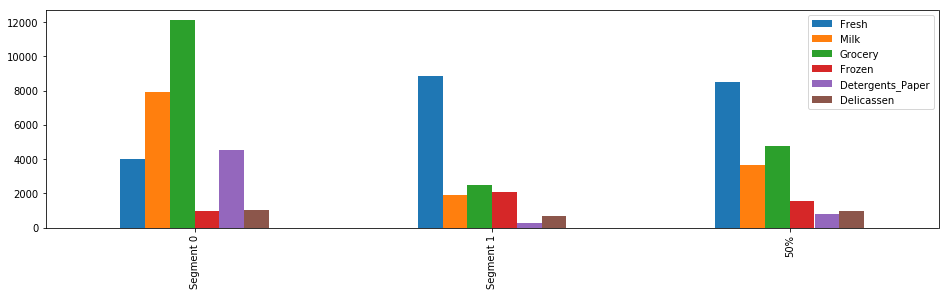

In [68]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers = true_centers.append(data.describe().loc['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?
Hint: A customer who is assigned to 'Cluster X' should best identify with the establishments represented by the feature set of 'Segment X'.

### Answer:

Based on the silhouette score maximization of a K-Means clustering algorithm, there are only 2 customer segments. The features witihin these segments all focus around food other than Detergents_Paper. This can lead to the conclusion that the two segments are restaurants and supermarkets because they provide business that requires spending on the features mentioned. Both supermarkets and restaurants have a focus on food and are different enough to be segmented.

Intuitively, supermarkets have higher spending on the Grocery feature than restaurants. Customers who are part of supermarket clusters should best identify with establishments represented by Segment 0 because of the spending on Grocery. Based on the visualization, we can see that Segment 0 spends much more on the Grocery feature as opposed to 50% of the data. Alternatively, customers who are part of restaurant clusters should identify with establishments represented by Segment 1 because those establishments have more spending on fresh food as opposed to Segment 0. From the visualization, it is clear that the Fresh feature in Segment 1 is greater than the one in Segment 0.

In [69]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print('Sample point', i, 'predicted to be in Cluster', pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


### Answer:

The sample points are categorized in either of the 2 clusters which may represent supermarkets and restaurants. All 3 sample points spent the most on groceries and this is consistent with the categorization with the cluster that may represent supermarkets.

### Conclusion
In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the customer segments, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which segment that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the customer segments to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run A/B tests when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?
Hint: Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### Answer:

The wholesale distributor can run A/B tests to gain deeper insights into the impact of a decision on different customer segments. There are two variants involved in running A/B tests and in our scenario one variant will be running a delivery service 5 days a week while the other will be running 3 days a week. Because testing all customers is unreasonable and costly, we can use customer segments to conduct better A/B tests that produce accurate results. After identifying the relevant segments we can conduct a porportional test on a sample of the customers. There are advantages to segmenting the samples including identifying customer segments that are more affected and gaining insight into if the change will affect all customers equally. We can apply the impact of each customer segment on the wholesale distributor to make better business decisions.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider 'customer segment' as an engineered feature for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a customer segment to determine the most appropriate delivery service.
How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?
Hint: A supervised learner could be used to train on the original customers. What would be the target variable?

### Answer:

When creating the clustering algorithm using sklearn, there is a predict method that assigns data points to a cluster based on the training data. Each of these clusters corresponds to a different customer segment and the distributor can use the model developed by the clustering algorithm to label a new customer to a customer segment. If the number of new customers are insignificant compared to the original training data size, the analysis from the original model can apply to the output of the new customers. This allows for labels to be assigned to new customers.

### Question 12
How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?

### Answer:

The underlying distribution of Hotel/Restaurant/Cafe or Retailer customers match the optimized ouput of the K-Means clustering algorithm. The chosen number of clusters was optimized based on the maximum silhouette score and the underlying structure confirms the predicted clusters. The model assigned discrete clusters without overlap but there is some overlap at the intersection for the classification of Retailer's or Hotels/Restaurants/Cafes'. There is a clear segmentation between the two but there exists customers that can be classified in either segment especially where the clusters intersect. These classifications are consistent with the definition of customer segments after applying the K-Means clustering algorithm.